In [234]:
cd /content/drive/My Drive/tobigs


/content/drive/My Drive/tobigs


In [0]:
#필요한 라이브러리 import

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [236]:
#데이터 불러오기
sample_submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test_df.csv")
train = pd.read_csv("train_df.csv")

print(f"Train data shape {train.shape}")
print(f"Test data shape {test.shape}")

Train data shape (42000, 785)
Test data shape (18000, 785)


In [237]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [238]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 데이터 전처리하기

In [0]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
X_test = test.iloc[:,1:].values

In [241]:
#y에 대하여 one-hot-encoding을 진행
import tensorflow as tf
y = tf.keras.utils.to_categorical(y)
y.shape

(42000, 10)

In [242]:
#Neural Net에 넣어주기 위해 X의 픽셀 값(0~255)를 (0~1)로 스케일링!
X = X / 255
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
X_test = X_test / 255 #X_test도 스케일링

In [0]:
#모델 성능 평가 위해서 validation set을 split 해준다
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.15,random_state=42)

In [245]:
print(x_train.shape,x_val.shape, y_train.shape, y_val.shape) #split후 shape 확인

(35700, 784) (6300, 784) (35700, 10) (6300, 10)


### **visualization**

(35700, 784) 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


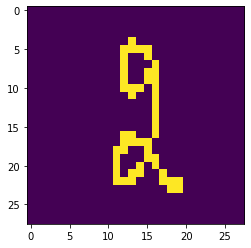

In [246]:
import matplotlib.pyplot as plt
print(x_train.shape, y_train[0].argmax())
print(y_train[0])
plt.imshow(x_train[0].reshape(28, 28, 1)[:,:,0])

### Model



*   Activation : 활성화 함수, 신경망의 출력을 결정하는 식
elu, selu, relu, leakyrelu, sigmoid 를 사용해보았고, loss가 가장 작게 나온  elu를 사용하였습니다 elu는 relu의 특성을 공유하면서, 그래디언트가 죽지 않는다는 장점이 있다고합니다 
마지막 레이어는 softmax 사용했습니다

*   Weight Initialization: 각 층의 가중치(weights)와 편항(bias)등 학습 파라미터는 초기값 설정이 매우 중요하기 때문에, 
kernel_initializer = 'he_normal'(he initialization), bias_initializer을 사용했습니다!

*   Batch normalization: 각 배치에서 이전 레이어의 activations을 정규화하는 batchnormalization을 진행했고 이동평균 및 이동 분산에 대한 모멘텀을 의미하는 momentum과 gamma weight를 위한 초기값 설정기 gamma_initializer을 따로 설정해주었습니다

*   Regularization: overfitting을 막기위해 필요한 규제로 dropout사용했습니다
neural net 중간중간에 넣었습니다! -> 학습을 하면서 weight들이 서로 동조하는 현상 피하기 위해









In [0]:
#DNN 설정

import tensorflow as tf
num_classes = 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation ='elu',input_shape=(28,28,1),kernel_initializer='he_normal'), #activation, weight initialize
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"), #batch normalization
    tf.keras.layers.Dropout(0.2), #regularization
    tf.keras.layers.Flatten(), #이건 input 값을 28*28*1로 reshape해두었기 때문에 펴주기 위해 사용
    tf.keras.layers.Dense(128, activation= 'elu', bias_initializer=tf.keras.initializers.he_normal(seed=None),kernel_initializer='he_normal'), #activation, weight initialization
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"), #batch normalization
    tf.keras.layers.Dropout(0.2), #regularization - dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='elu', bias_initializer=tf.keras.initializers.he_normal(seed=None),kernel_initializer='he_normal'),#activation, weight initialization
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"), #batch normalization
    tf.keras.layers.Dropout(0.2), #regularization - dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')]) #activation (softmax) output shape 는 (10,)이다




*   Optimization:
optimizer로 rmsprop, adam, adagrad 사용해보았는데 사실 거의 비슷하게 나왔는데 가장 loss 작게 나온 adam 선택했습니다!
adam은 adagrad와 rmsprop의 학습 파라미터의 개별 원소마다 학습률을 달리 적용하는 기법을 합친것!


In [248]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"]) #optimizer: adam 사용
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 28, 28, 64)        128       
_________________________________________________________________
batch_normalization_42 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_42 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               6422656   
_________________________________________________________________
batch_normalization_43 (Batc (None, 128)               512       
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)             

In [249]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)


print(x_train.shape,x_val.shape, y_train.shape, y_val.shape)


(35700, 28, 28, 1) (6300, 28, 28, 1) (35700, 10) (6300, 10)


In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#여러 노트북들 참고해보다가 keras의 콜백함수 ReduceLRONPlateau를 사용해서 학습률이 개선되지 않을 때, 학습률을 동적으로 조정하여 학습률을 동적으로 조정하여 학습률을 개선하도록 하는게 많이 있길래
#사용해보았습니다!

#이걸 통해서 경사하강법에 의하여 학습을 하는 경우 local minima에 빠져버리게 되면, 더이상 학습률이 개선되지 않고 정체되는 현상을 개선해줍니다
#local minima에 빠져버린 경우, 쉽게 빠져나오지 못하고 갇혀버리게 되는데, 이 때 learning rate를 늘려주거나 줄여주는 방법으로 빠져나오는 효과를 준다고 하네용

#각 파라미터들에 대한 설명은 다른 notebook 참고했습니다

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss',    # Quantity to be monitored.
    factor=0.25,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.0001     # lower bound on the learning rate.
    )

#Regularization중 하나였던 earlystopping도 사용했습니다
#earlystopping 콜백을 활용하여, model의 성능 지표가 설정한 epoch동안 개선되지 않을 때 조기 종료할 수 있도록 설정했습니다
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

In [251]:
history = model.fit(x_train,y_train,
                    batch_size=512,
                    epochs=25,
                    validation_data=[x_val,y_val],
                    callbacks = [learning_rate_reduction,es])

Train on 35700 samples, validate on 6300 samples
Epoch 1/25
35700/35700 [==============================] - 4s 112us/sample - loss: 1.3027 - acc: 0.8996 - val_loss: 0.4564 - val_acc: 0.9500
Epoch 2/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.2547 - acc: 0.9635 - val_loss: 0.1483 - val_acc: 0.9708
Epoch 3/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.1183 - acc: 0.9754 - val_loss: 0.1001 - val_acc: 0.9763
Epoch 4/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.0777 - acc: 0.9830 - val_loss: 0.0847 - val_acc: 0.9768
Epoch 5/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.0577 - acc: 0.9867 - val_loss: 0.0710 - val_acc: 0.9792
Epoch 6/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.0425 - acc: 0.9907 - val_loss: 0.0643 - val_acc: 0.9819
Epoch 7/25
35700/35700 [==============================] - 2s 54us/sample - loss: 0.0336 - acc: 0.9923 - val_loss: 0.

In [0]:
x_test = test.iloc[:,1:].values

In [0]:
x_test = x_test.reshape(-1,28,28,1)

In [0]:
x_test = x_test / 255

In [0]:
predictions = model.predict_classes(x_test)

In [256]:
sample_submission['Category'] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("submission.csv",index=False)